# Kütüphanelerin Yüklenmesi

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import keras
import seaborn as sns
import matplotlib.pyplot as plt
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.graph_objs as go
import warnings
warnings.filterwarnings("ignore")
# Input data files are available in the read-only "../input/" directory
# For m, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/creditcardfraud/creditcard.csv


# Veriyi yükleme

In [2]:
df = pd.read_csv("/kaggle/input/creditcardfraud/creditcard.csv")

# Veriye Genel Bakış

In [3]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [5]:
df.nunique()

Time      124592
V1        275663
V2        275663
V3        275663
V4        275663
V5        275663
V6        275663
V7        275663
V8        275663
V9        275663
V10       275663
V11       275663
V12       275663
V13       275663
V14       275663
V15       275663
V16       275663
V17       275663
V18       275663
V19       275663
V20       275663
V21       275663
V22       275663
V23       275663
V24       275663
V25       275663
V26       275663
V27       275663
V28       275663
Amount     32767
Class          2
dtype: int64

In [6]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.918649e-15,5.682686e-16,-8.761736e-15,2.811118e-15,-1.552103e-15,2.040130e-15,-1.698953e-15,-1.893285e-16,-3.147640e-15,...,1.473120e-16,8.042109e-16,5.282512e-16,4.456271e-15,1.426896e-15,1.701640e-15,-3.662252e-16,-1.217809e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [7]:
df.isna().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

# Veri Görselleştirme

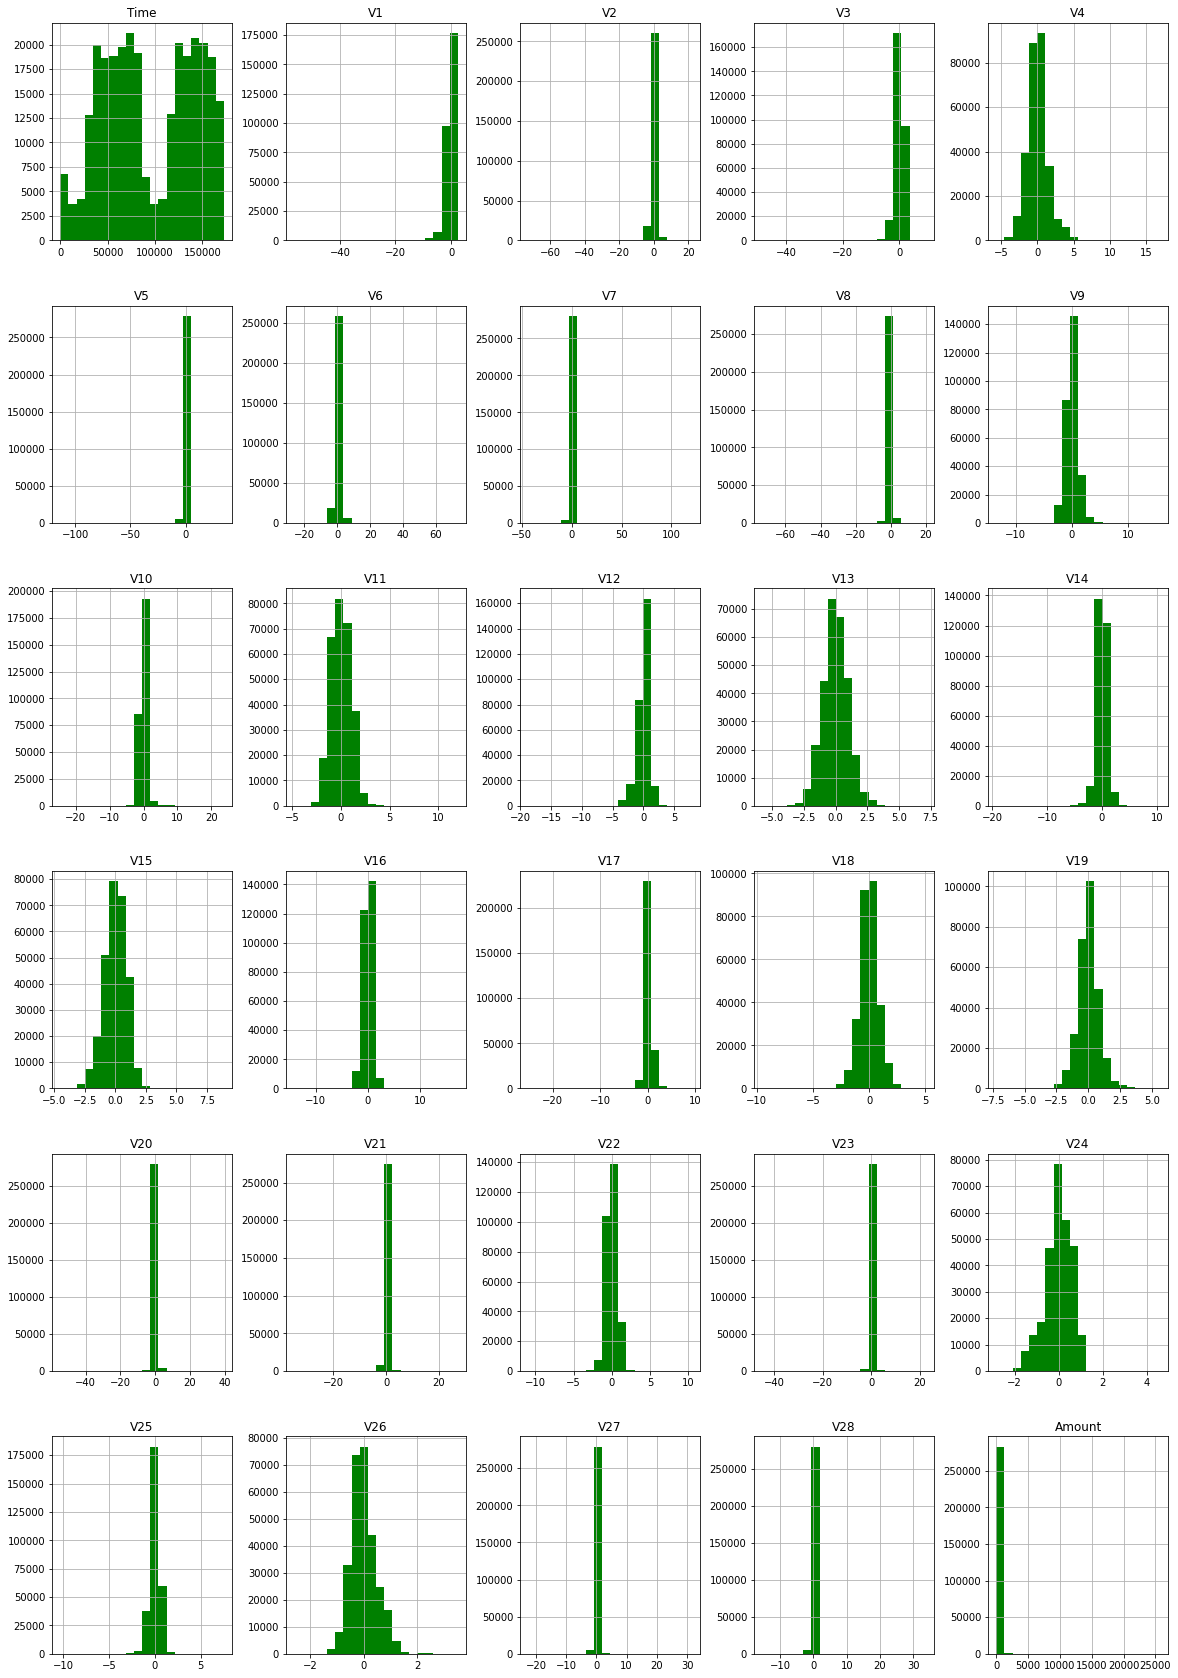

In [8]:
df.iloc[:, 0:-1].hist(bins = 20, figsize = (20,30), color = "g",)
plt.show()

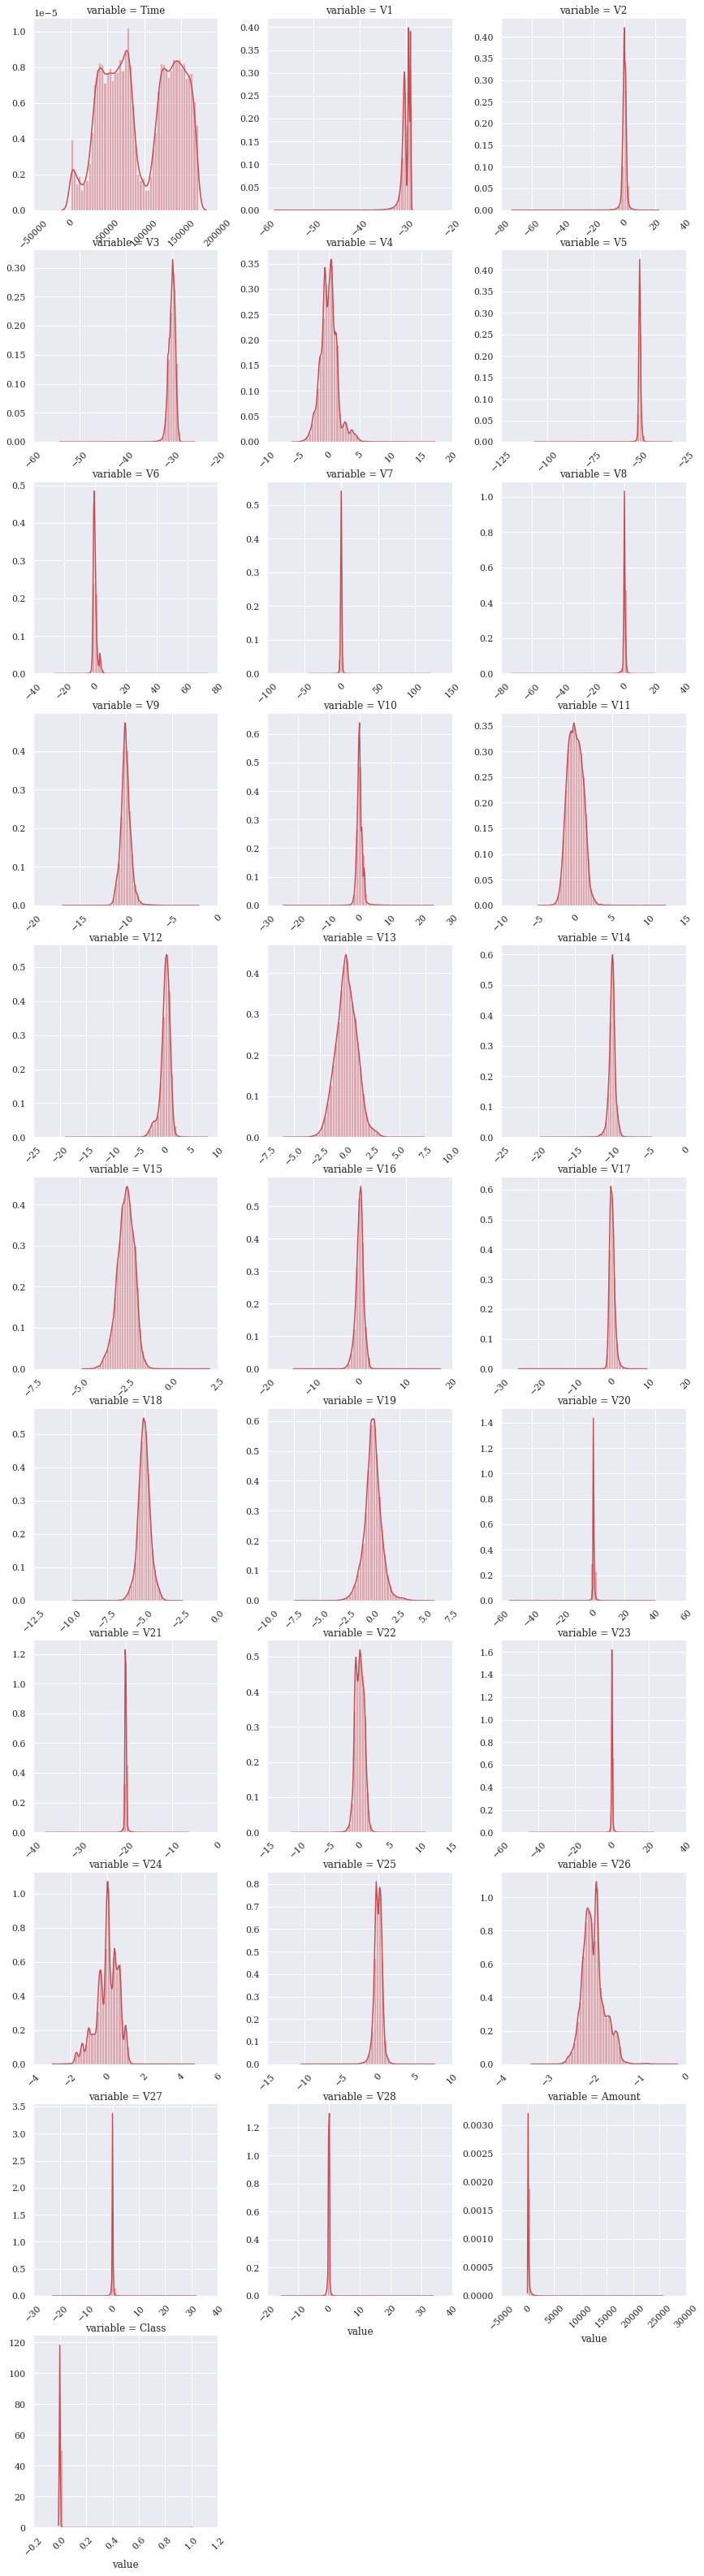

In [9]:
con_1 = pd.melt(df,value_name='value', ignore_index=True)

# Seaborn customizations
sns.set_theme(style="darkgrid", font='serif', context='notebook')

# initializing our FacetGrid object and using map to create subplots
g = sns.FacetGrid(con_1, col='variable', col_wrap=3, sharex=False, sharey=False, height=4)
g = g.map(sns.distplot, 'value', color='r')

# Matplotlib customization
g.set_xticklabels(rotation=45)
plt.show()

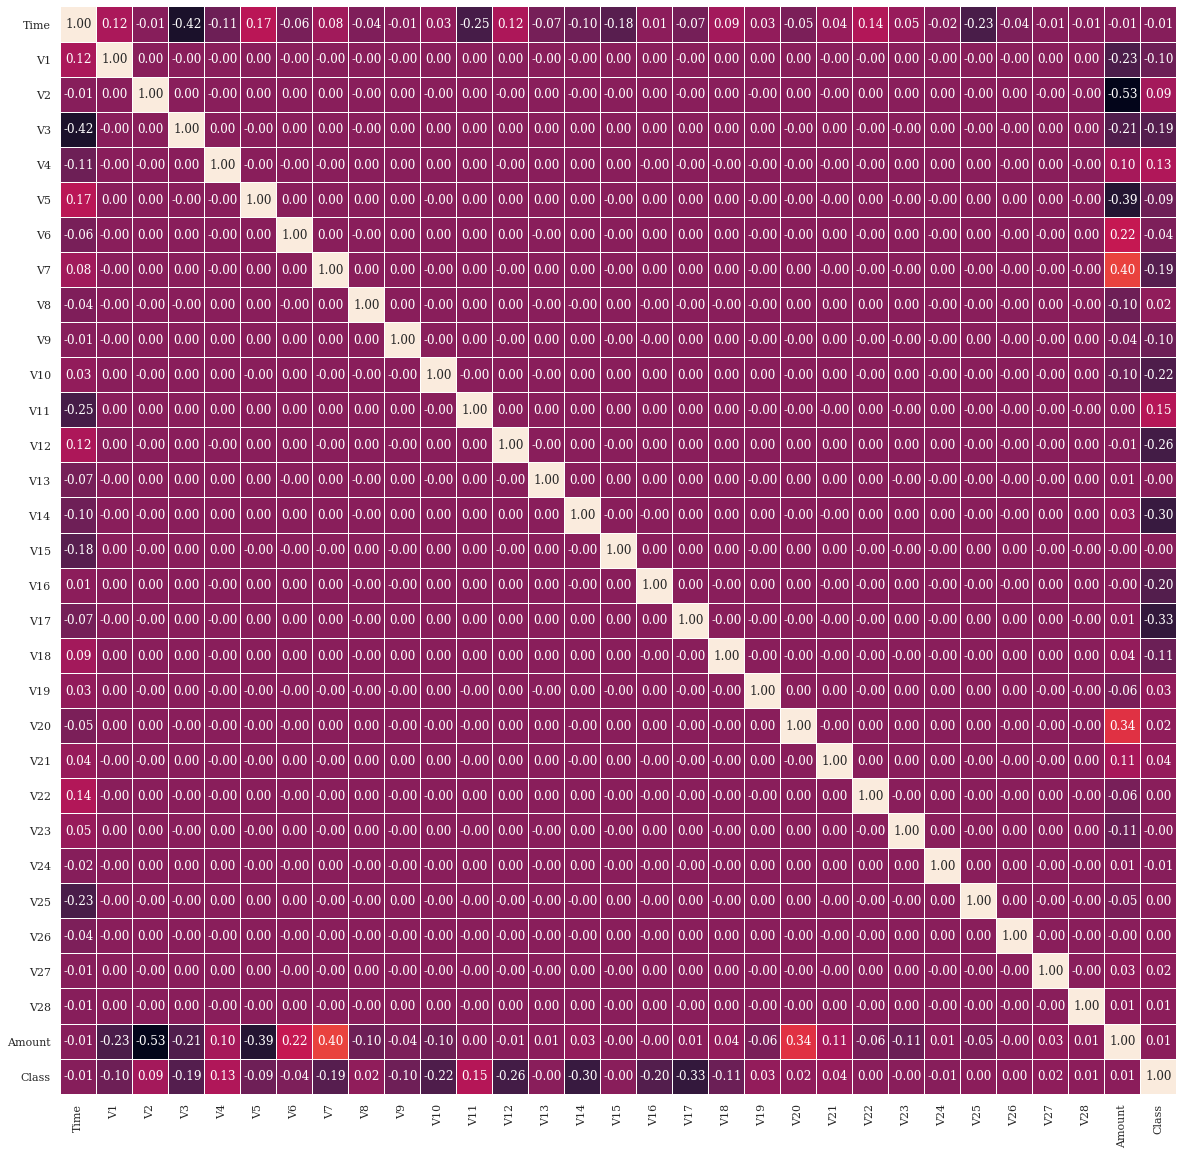

In [10]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(), annot=True, fmt=".2f", linecolor="w",linewidths=.5, cbar=False)
plt.show()

In [11]:
np.abs(df.corr()["Class"]).sort_values(ascending = False)

Class     1.000000
V17       0.326481
V14       0.302544
V12       0.260593
V10       0.216883
V16       0.196539
V3        0.192961
V7        0.187257
V11       0.154876
V4        0.133447
V18       0.111485
V1        0.101347
V9        0.097733
V5        0.094974
V2        0.091289
V6        0.043643
V21       0.040413
V19       0.034783
V20       0.020090
V8        0.019875
V27       0.017580
Time      0.012323
V28       0.009536
V24       0.007221
Amount    0.005632
V13       0.004570
V26       0.004455
V15       0.004223
V25       0.003308
V23       0.002685
V22       0.000805
Name: Class, dtype: float64

In [12]:
filtre = np.abs(df.corr()["Class"])>0.2
corr_columns = df.columns[filtre].tolist()
correlations = df[corr_columns].corr()

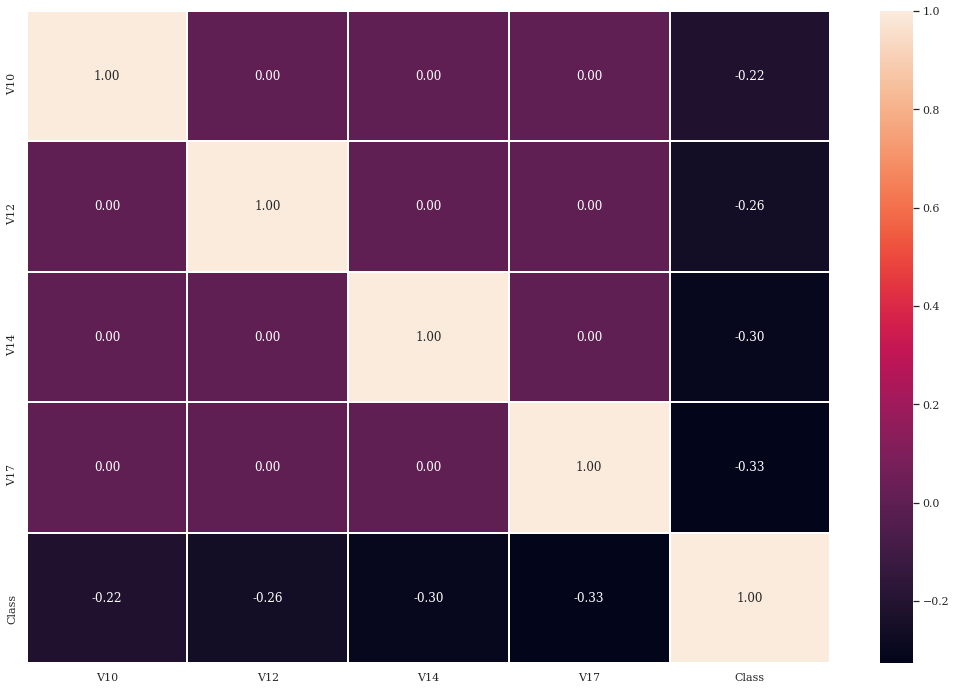

In [13]:
plt.figure(figsize=(18,12))
sns.heatmap(correlations, annot = True, linewidths=.4, linecolor="w",fmt=".2f")
plt.show()

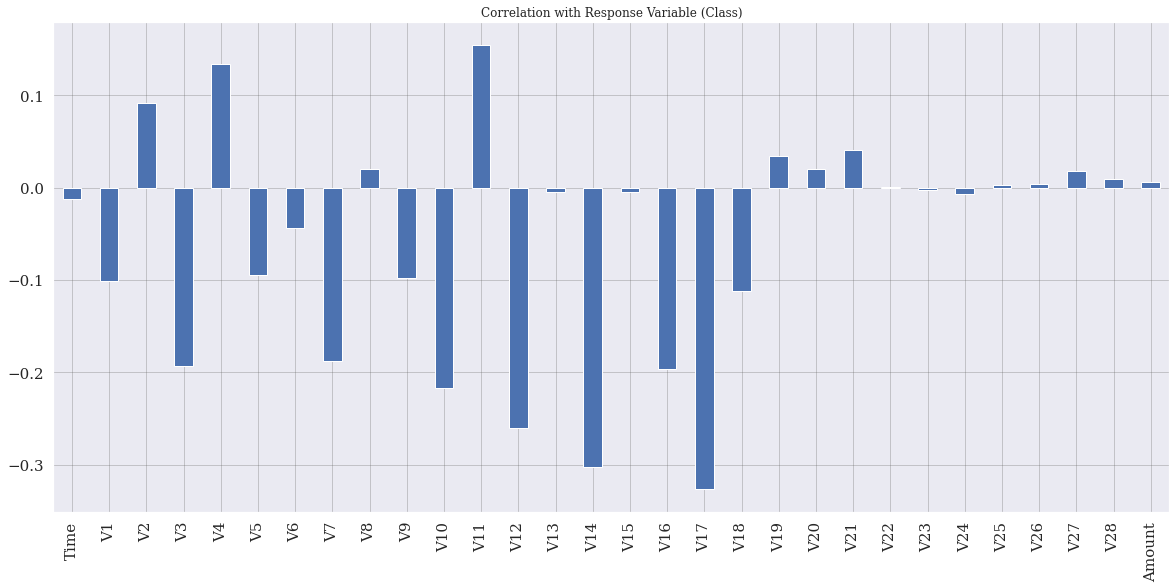

In [14]:
df.drop(columns = ["Class"], axis = 1).corrwith(df.Class).plot.bar(figsize=(20,9), 
                                                 title="Correlation with Response Variable (Class)",
                                                 fontsize=15,
                                                 rot=45,
                                                 )
plt.grid(b=True, which='major', color='#666666', linestyle='-', alpha=.3)
plt.xticks(rotation=90)
plt.show()

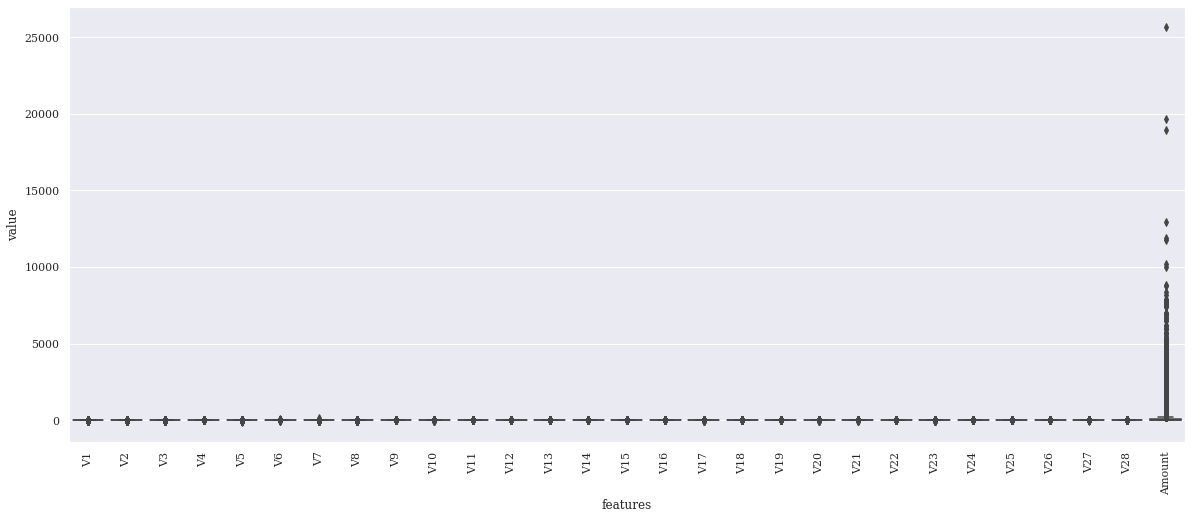

In [15]:
df_melted = pd.melt(df.iloc[:, 1:-1],  var_name='features', value_name='value')
plt.figure(figsize=(20,8))
sns.boxplot(x ='features', y='value', data=df_melted)
plt.xticks(rotation=90)
plt.show()

In [16]:
df.Class.value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [17]:
data = [go.Histogram(x = df.Class)]
fig = go.Figure(data)
iplot(fig)

# Veri Ön İşleme

In [18]:
from sklearn.preprocessing import StandardScaler

In [19]:
sc = StandardScaler()

In [20]:
df["NormalizedAmount"] = sc.fit_transform(df["Amount"].values.reshape(-1, 1))

In [21]:
df.drop(columns = ["Amount"], inplace = True)

In [22]:
df.drop(columns = ["Time"], inplace = True)

In [23]:
X = df.iloc[:, df.columns != "Class"]
y = df.iloc[:, df.columns == "Class"]

# Eğitim ve Test Verilerinin Hazırlanması

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [25]:
X_train.shape

(199364, 29)

In [26]:
X_test.shape

(85443, 29)

In [27]:
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test =  np.array(y_test)

# Model Seçilmesi ve Modelin Kurulması

In [28]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

In [29]:
model = Sequential([
    Dense(units = 16, input_dim = 29, activation = "relu"),
    Dense(units = 24, activation = "relu"),
    Dropout(0.5),
    Dense(20, activation = "relu"),
    Dense(24, activation = "relu"),
    Dense(1, activation = "sigmoid")
])

In [30]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                480       
_________________________________________________________________
dense_1 (Dense)              (None, 24)                408       
_________________________________________________________________
dropout (Dropout)            (None, 24)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 20)                500       
_________________________________________________________________
dense_3 (Dense)              (None, 24)                504       
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 25        
Total params: 1,917
Trainable params: 1,917
Non-trainable params: 0
______________________________________________________

# Modelin Eğitilmesi(Training)

## 1 - Yapay Sinir Ağları

In [31]:
model.compile(optimizer = "adam", loss = "binary_crossentropy", metrics = ["accuracy"])
model.fit(X_train, y_train, batch_size = 15, epochs = 5)

Epoch 1/5
13291/13291 [==============================] - 19s 1ms/step - loss: 0.0289 - accuracy: 0.9968
Epoch 2/5
13291/13291 [==============================] - 19s 1ms/step - loss: 0.0040 - accuracy: 0.9993
Epoch 3/5
13291/13291 [==============================] - 19s 1ms/step - loss: 0.0035 - accuracy: 0.9994
Epoch 4/5
13291/13291 [==============================] - 19s 1ms/step - loss: 0.0034 - accuracy: 0.9993
Epoch 5/5
13291/13291 [==============================] - 21s 2ms/step - loss: 0.0033 - accuracy: 0.9993


In [32]:
score = model.evaluate(X_test, y_test)

2671/2671 [==============================] - 3s 1ms/step - loss: 0.0035 - accuracy: 0.9994


In [33]:
print(score)

[0.0034628340508788824, 0.999426543712616]


In [34]:
y_pred = model.predict(X_test)

In [35]:
y_pred = np.rint(y_pred)

## Yapay Sinir Ağları Model Değerlendirmesi

In [36]:
from sklearn.metrics import confusion_matrix, f1_score, precision_score, recall_score

In [37]:
confusion_matrix(y_test, y_pred)

array([[85275,    21],
       [   28,   119]])

In [38]:
f1_score(y_test, y_pred)

0.8292682926829269

In [39]:
precision_score(y_test, y_pred)

0.85

## 2 - Random Forest

In [40]:
from sklearn.ensemble import RandomForestClassifier

In [41]:
rf = RandomForestClassifier(n_estimators = 200)
rf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=200)

In [42]:
y_pred = rf.predict(X_test)

## Random Forest Model Değerlendirmesi

In [43]:
confusion_matrix(y_test, y_pred)

array([[85289,     7],
       [   34,   113]])

In [44]:
f1_score(y_test, y_pred)

0.846441947565543

In [45]:
precision_score(y_test, y_pred)

0.9416666666666667

## 3 - Decision Tree

In [46]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()

In [47]:
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [48]:
y_pred = dt.predict(X_test)

## Decision Tree Model Değerlendirmesi

In [49]:
confusion_matrix(y_test, y_pred)

array([[85267,    29],
       [   36,   111]])

In [50]:
f1_score(y_test, y_pred)

0.7735191637630662

In [51]:
precision_score(y_test, y_pred)

0.7928571428571428

# Örnekleme(Sampling)

## Undersampling

In [52]:
df[df.Class==1].head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Class,NormalizedAmount
541,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,-2.772272,...,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,1,-0.353229
623,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,-0.838587,...,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,1,1.761758
4920,-2.303350,1.759247,-0.359745,2.330243,-0.821628,-0.075788,0.562320,-0.399147,-0.238253,-1.525412,...,-0.294166,-0.932391,0.172726,-0.087330,-0.156114,-0.542628,0.039566,-0.153029,1,0.606031
6108,-4.397974,1.358367,-2.592844,2.679787,-1.128131,-1.706536,-3.496197,-0.248778,-0.247768,-4.801637,...,0.573574,0.176968,-0.436207,-0.053502,0.252405,-0.657488,-0.827136,0.849573,1,-0.117342
6329,1.234235,3.019740,-4.304597,4.732795,3.624201,-1.357746,1.713445,-0.496358,-1.282858,-2.447469,...,-0.379068,-0.704181,-0.656805,-1.632653,1.488901,0.566797,-0.010016,0.146793,1,-0.349231


In [53]:
fraud_indices = np.array(df[df.Class == 1].index)
number_fraud = len(fraud_indices)
print(number_fraud)

492


In [54]:
normal_indices = df[df.Class == 0].index

In [55]:
random_normal_indices = np.random.choice(normal_indices, number_fraud, replace = False)
random_normal_indices = np.array(random_normal_indices)
print(len(random_normal_indices))

492


In [56]:
random_normal_indices

array([ 76795, 101027, 107699,   2366,  49463,  77602,  31209,  57081,
       219750, 240237,  67879, 110587, 218390, 246387,  24597, 247687,
       162859,  35956, 248806, 139355,  33673, 280431,  58976, 251137,
        90104, 197345,  48278, 221916,  45091, 268611, 191716, 140445,
       251456,  11980, 267518,  20784, 277536, 234448, 202152, 238919,
       202029, 282555, 247858, 279569,  46437,  53353, 174573, 173972,
       117771,  92685,  50777, 248350,  78440, 231303,   5565, 237966,
        16568, 178541, 164345,  72767, 180985, 228098, 190409,  64308,
       218934, 199005,    135, 206498,  17992,  10030, 127869, 153138,
       192272, 167502,   2980,  59077, 216637, 209114,  27450, 282585,
       265216, 107211,  60614, 126468, 107684, 203983, 253545,  40951,
        28325, 177839,  41123,  57450,  72322, 230316, 261705, 216836,
        85706,  59320,  93373, 198526, 187206,  95089,  98325, 234877,
       107845,  45913,  23314,  84699, 259561, 211463, 107884, 134436,
      

In [57]:
fraud_indices

array([   541,    623,   4920,   6108,   6329,   6331,   6334,   6336,
         6338,   6427,   6446,   6472,   6529,   6609,   6641,   6717,
         6719,   6734,   6774,   6820,   6870,   6882,   6899,   6903,
         6971,   8296,   8312,   8335,   8615,   8617,   8842,   8845,
         8972,   9035,   9179,   9252,   9487,   9509,  10204,  10484,
        10497,  10498,  10568,  10630,  10690,  10801,  10891,  10897,
        11343,  11710,  11841,  11880,  12070,  12108,  12261,  12369,
        14104,  14170,  14197,  14211,  14338,  15166,  15204,  15225,
        15451,  15476,  15506,  15539,  15566,  15736,  15751,  15781,
        15810,  16415,  16780,  16863,  17317,  17366,  17407,  17453,
        17480,  18466,  18472,  18773,  18809,  20198,  23308,  23422,
        26802,  27362,  27627,  27738,  27749,  29687,  30100,  30314,
        30384,  30398,  30442,  30473,  30496,  31002,  33276,  39183,
        40085,  40525,  41395,  41569,  41943,  42007,  42009,  42473,
      

In [58]:
under_sample_indices = np.concatenate((fraud_indices, random_normal_indices), axis=0)

In [59]:
len(under_sample_indices)

984

In [60]:
under_sample_data = df.iloc[under_sample_indices, :]

In [61]:
X_undersample = under_sample_data.iloc[:, under_sample_data.columns != "Class"]
y_undersample = under_sample_data.iloc[:, under_sample_data.columns == "Class"]

In [94]:
y_undersample.value_counts()

Class
0        492
1        492
dtype: int64

<AxesSubplot:>

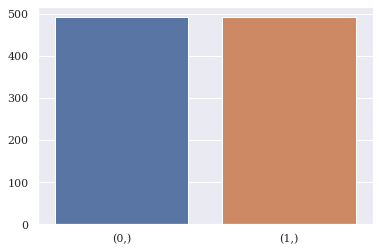

In [95]:
sns.barplot(x = y_undersample.value_counts().index.values, y= y_undersample.value_counts().values)

In [62]:
X_train, X_test, y_train, y_test = train_test_split(X_undersample, y_undersample, test_size = 0.30)

In [63]:
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test =  np.array(y_test)

In [64]:
model = Sequential([
    Dense(units = 16, input_dim = 29, activation = "relu"),
    Dense(units = 24, activation = "relu"),
    Dropout(0.5),
    Dense(20, activation = "relu"),
    Dense(24, activation = "relu"),
    Dense(1, activation = "sigmoid")
])

In [65]:
model.compile(optimizer = "adam", loss = "binary_crossentropy", metrics = ["accuracy"])
model.fit(X_train, y_train, batch_size = 15, epochs = 5)

Epoch 1/5
46/46 [==============================] - 1s 2ms/step - loss: 0.6803 - accuracy: 0.5557
Epoch 2/5
46/46 [==============================] - 0s 2ms/step - loss: 0.4991 - accuracy: 0.7015
Epoch 3/5
46/46 [==============================] - 0s 2ms/step - loss: 0.4017 - accuracy: 0.8515
Epoch 4/5
46/46 [==============================] - 0s 2ms/step - loss: 0.3387 - accuracy: 0.9155
Epoch 5/5
46/46 [==============================] - 0s 2ms/step - loss: 0.2449 - accuracy: 0.9317


In [66]:
score = model.evaluate(X_test, y_test)

10/10 [==============================] - 0s 1ms/step - loss: 0.1952 - accuracy: 0.9358


In [67]:
print(score)

[0.1951511651277542, 0.9358108043670654]


In [68]:
y_pred = model.predict(X_test)

In [69]:
y_pred = np.rint(y_pred)

In [70]:
confusion_matrix(y_test, y_pred)

array([[142,   0],
       [ 19, 135]])

## Smote

In [71]:
%%bash
pip install -U imbalanced-learn

In [72]:
from imblearn.over_sampling import SMOTE

In [73]:
X_resample, y_resample = SMOTE().fit_resample(X, y.values.ravel())

In [74]:
y_resample = pd.DataFrame(y_resample)
X_resample = pd.DataFrame(X_resample)

In [91]:
y_resample.value_counts()

0    284315
1    284315
dtype: int64

<AxesSubplot:>

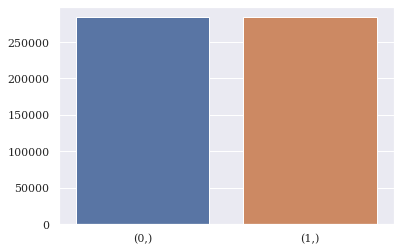

In [92]:
sns.barplot(x = y_resample.value_counts().index.values, y = y_resample.value_counts().values)

In [75]:
X_train, X_test, y_train, y_test = train_test_split(X_resample, y_resample, test_size = 0.3)

In [76]:
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test =  np.array(y_test)

In [77]:
model.compile(optimizer = "adam", loss = "binary_crossentropy", metrics = ["accuracy"])
model.fit(X_train, y_train, batch_size = 15, epochs = 5)

Epoch 1/5
26537/26537 [==============================] - 45s 2ms/step - loss: 0.0742 - accuracy: 0.9718
Epoch 2/5
26537/26537 [==============================] - 43s 2ms/step - loss: 0.0216 - accuracy: 0.9933
Epoch 3/5
26537/26537 [==============================] - 46s 2ms/step - loss: 0.0165 - accuracy: 0.9953
Epoch 4/5
26537/26537 [==============================] - 43s 2ms/step - loss: 0.0139 - accuracy: 0.9961
Epoch 5/5
26537/26537 [==============================] - 43s 2ms/step - loss: 0.0124 - accuracy: 0.9968


In [78]:
score = model.evaluate(X_test, y_test)

5331/5331 [==============================] - 5s 972us/step - loss: 0.0115 - accuracy: 0.9981


In [79]:
print(score)

[0.011458023451268673, 0.998053789138794]


In [83]:
y_pred = model.predict(X_test)

In [84]:
y_pred = np.rint(y_pred)

In [85]:
confusion_matrix(y_test, y_pred)

array([[84903,   196],
       [  136, 85354]])